In [2]:
import sys
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
from scipy import stats, integrate
import matplotlib.ticker as tk
import matplotlib as mpl
import os
import heapq

In [3]:
sys.path.append('/home/jtb34/GitHub/GACF/')
from NGTS.NGTS_Field import return_field_from_object_directory
from NGTS.GACF_utils import TIME_CONVERSIONS

In [4]:
FIELDNAME = 'NG0442-3345' 

In [5]:
field = return_field_from_object_directory(os.path.join('/appch/data/jtb34', ""), FIELDNAME,
                                           test='CYCLE1802')


	 object file not found in /appch/data/jtb34/NG0442-3345/549_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/568_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/573_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/598_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/599_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/601_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/612_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/142_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/144_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/822_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/3827_VERSION_CYCLE1802


	 object file not found in /appch/data/jtb34/NG0442-3345/10244_VERSION_CYCLE1802


	 object file not found 

matched 5059 of 5060 files


In [8]:
objdata = {}
max_s2n = []
num_vals = 10
# s2n_max = 0
for obj in field:
        objdata[obj.obj] = {'periods': list(obj.periods), 's2n': list(obj.peak_signal_to_noise)}
        if len(obj.periods) > 0:
#             if max(obj.peak_signal_to_noise) > s2n_max:
#                 s2n_max = max(obj.peak_signal_to_noise)
            heaptuple = (max(obj.peak_signal_to_noise), (obj.obj, max(obj.periods)))
            if len(max_s2n) < 10:
                heapq.heappush(max_s2n, heaptuple)
#                 print 'Pushing {}'.format(heaptuple)
            else:
                heapq.heappushpop(max_s2n, heaptuple)
#                 print 'Testing {}'.format(heaptuple)

# print s2n_max
print max_s2n

[(15.733167170974191, (22058, 26.7177828879934)), (16.118539513881462, (605, 53.437188742888736)), (15.922606120073029, (15969, 30.53457564403633)), (16.51841860621312, (18479, 53.43701580062097)), (16.89964513206518, (14887, 0.9964678414471712)), (35.203884279852225, (7415, 61.0715383259435)), (15.938525058903512, (17263, 53.437518450232446)), (18.261520129712707, (7200, 53.43723572395676)), (17.294960061344106, (24125, 53.437168940825)), (17.84709663187893, (17369, 47.499426880360346))]


NGTS Object NG0442-3345_22058 (CYCLE1802) 15.73 sigma times threshold
Magnitude 9.24604701996


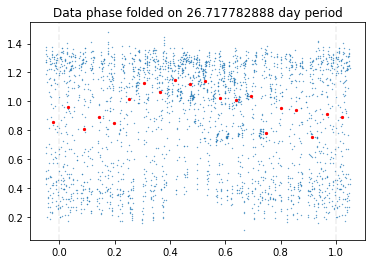

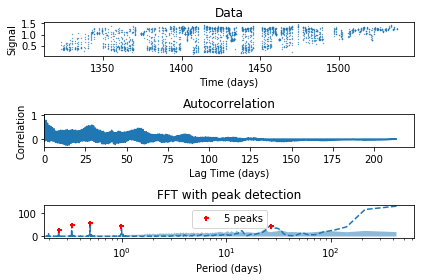

NGTS Object NG0442-3345_605 (CYCLE1802) 16.12 sigma times threshold
Magnitude 11.3374242783


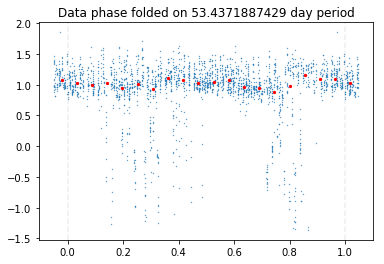

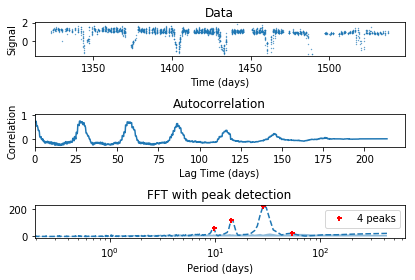

NGTS Object NG0442-3345_15969 (CYCLE1802) 15.92 sigma times threshold
Magnitude 9.27106285095


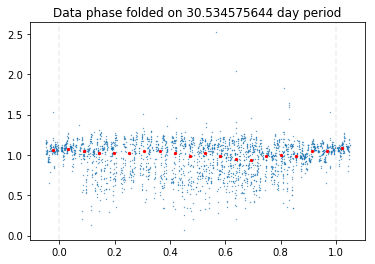

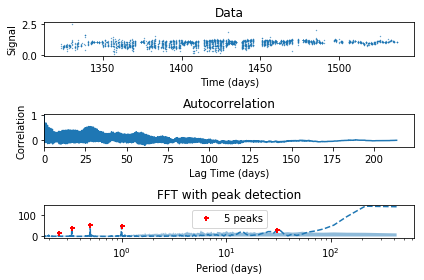

NGTS Object NG0442-3345_18479 (CYCLE1802) 16.52 sigma times threshold
Magnitude 10.3956203461


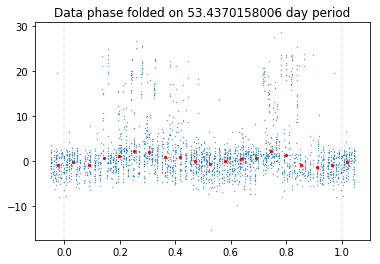

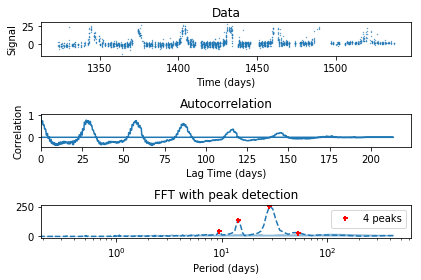

NGTS Object NG0442-3345_14887 (CYCLE1802) 16.90 sigma times threshold
Magnitude 11.2171850204


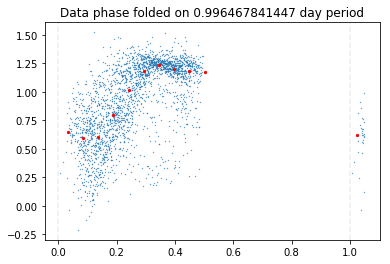

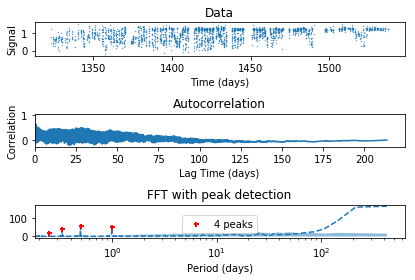

NGTS Object NG0442-3345_7415 (CYCLE1802) 35.20 sigma times threshold
Magnitude 11.054690361


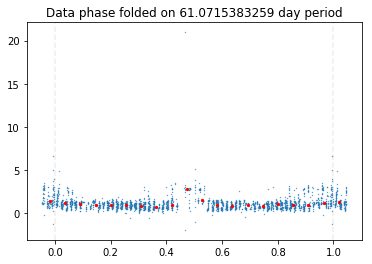

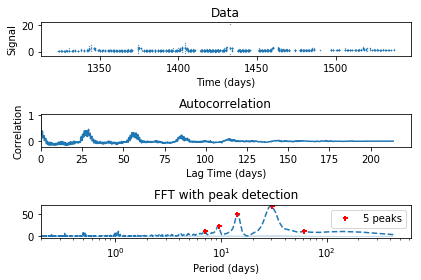

NGTS Object NG0442-3345_17263 (CYCLE1802) 15.94 sigma times threshold
Magnitude 11.2491359711


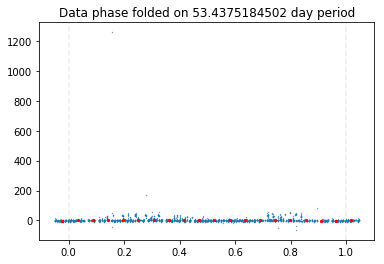

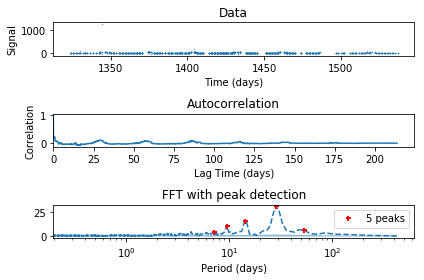

NGTS Object NG0442-3345_7200 (CYCLE1802) 18.26 sigma times threshold
Magnitude 10.3750209808


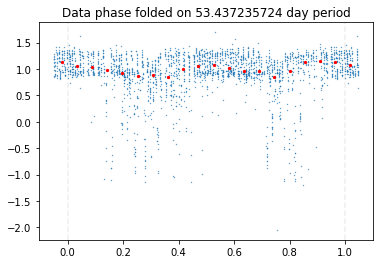

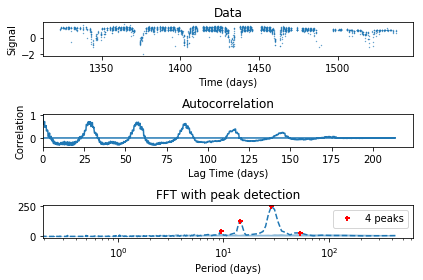

NGTS Object NG0442-3345_24125 (CYCLE1802) 17.29 sigma times threshold
Magnitude 11.7722949982


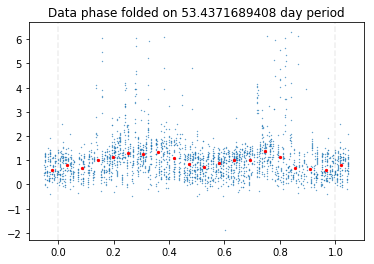

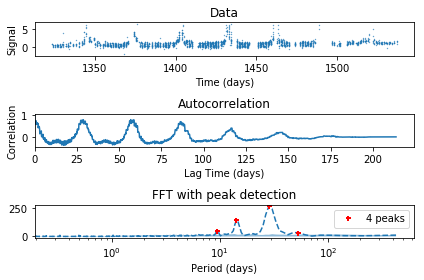

NGTS Object NG0442-3345_17369 (CYCLE1802) 17.85 sigma times threshold
Magnitude 11.4334068298


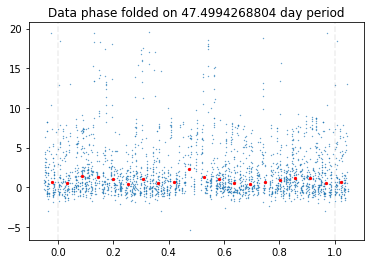

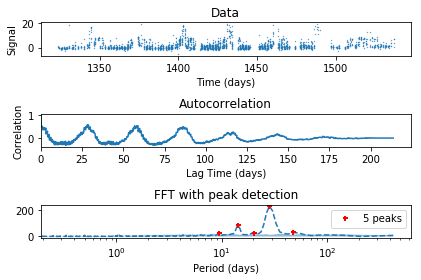

In [16]:
for o in max_s2n:
    obj_id = o[1][0]
    period = o[1][1]
    print field[obj_id], "{0:.2f} sigma times threshold".format(max(field[obj_id].peak_signal_to_noise))
    print "Magnitude {}".format(field[obj_id].mag)
    field[obj_id].plot_phase_folded_lc(period, interactive=True)
    field[obj_id].plot_data_autocol_ft(interactive=True)

In [ ]:
heapq.heappush(blah, (1, (2,3)))
print blah

In [ ]:
heapq.heappush(blah, (2, (2,3)))
print blah

In [ ]:
heapq.heappushpop(blah, (7, (2,3)))
print blah

In [ ]:
for v in blah:
    print v

In [12]:
from ngtsio import ngtsio
    

In [13]:
mag_data = ngtsio.get(fieldname=field.fieldname, ngts_version=field.test, obj_id=field.object_list, keys=['OBJ_ID', 'MAG_MEAN'])

('Field name:', 'NG0442-3345')
('NGTS version:', 'CYCLE1802')
('Object IDs (', 5059, '):', array(['000142', '000144', '000154', ..., '024179', '024180', '024191'],
      dtype='|S6'))
###############################################################################
Success: All keys successfully read into dictionary.
###############################################################################


In [14]:
obj_data = zip(mag_data['OBJ_ID'].astype(int), mag_data['MAG_MEAN'])

In [15]:
for o in obj_data:
    try:
        field[o[0]].mag = o[1]
    except KeyError as e:
        print "Object {} not in field".format(o[0])
        continue

Object 142 not in field
Object 144 not in field
Object 549 not in field
Object 568 not in field
Object 573 not in field
Object 598 not in field
Object 599 not in field
Object 601 not in field
Object 612 not in field
Object 822 not in field
Object 3827 not in field
Object 10049 not in field
Object 10244 not in field
Object 14679 not in field
Object 14683 not in field
Object 14884 not in field
Object 14984 not in field
Object 15229 not in field
Object 15385 not in field
Object 17142 not in field
Object 17143 not in field
Object 17501 not in field
Object 21054 not in field
Object 21752 not in field
Object 23186 not in field
Object 23619 not in field
Object 24162 not in field
Object 24178 not in field
Object 24179 not in field
Object 24180 not in field
Object 24191 not in field


In [18]:
mags = [obj.mag for obj in field]

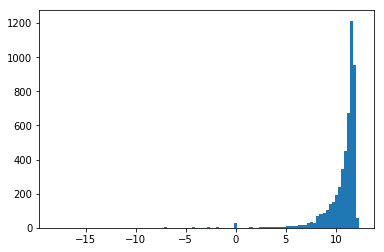

In [19]:
plt.hist(mags, bins=100)
plt.show()

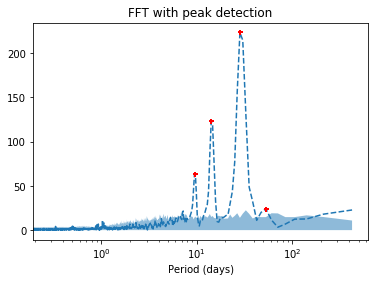

In [18]:
field[605].plot_ft(interactive=True)

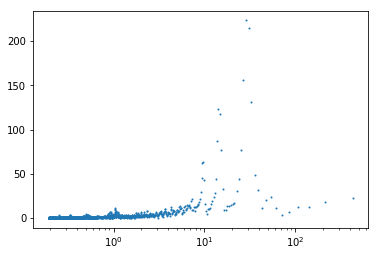

In [20]:
fig, ax = plt.subplots()
obj = field[605]
ax.scatter(obj.period_axis, obj.ft, s=1)
ax.set_xscale('log')
plt.show()

In [21]:
import numpy.fft as fft
import peakutils
def fourier_transform_and_peaks(correlations, lag_timeseries, len_ft=None):
    if len_ft is None:
        len_ft = len(lag_timeseries)
 
    complex_ft = fft.rfft(correlations, n=len_ft)
    freqs = fft.rfftfreq(len_ft, lag_timeseries[1] - lag_timeseries[0])

#     periods = 1 / freqs 
    ft = np.abs(complex_ft)

    # Find peaks of FFT

    indexes = peakutils.indexes(ft, thres=0.1,  # Fraction of largest peak
                                min_dist=5  # Number of data points between
                                )

    return ft, freqs, indexes

In [25]:
ft, freqs, indexes = fourier_transform_and_peaks(obj.correlations, obj.lag_timeseries)

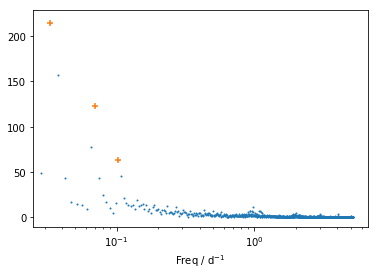


	 divide by zero encountered in divide



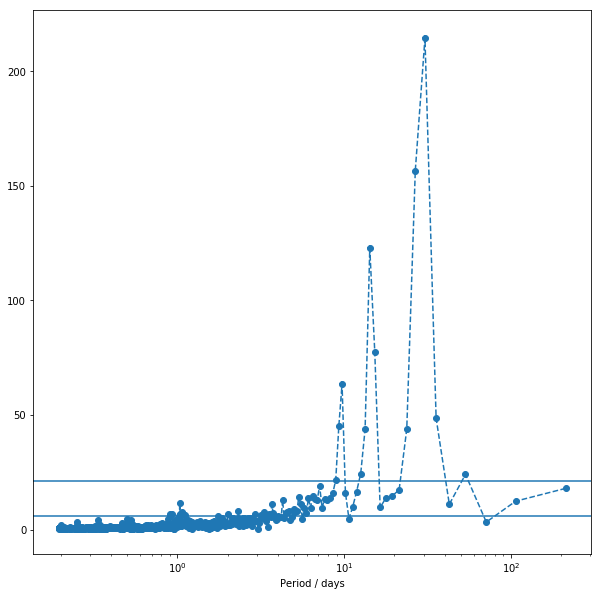

In [40]:
plt.scatter(freqs, ft, s=1)
plt.xscale('log')
plt.scatter(freqs[indexes], ft[indexes], marker='+')
plt.xlabel('Freq / d$^{-1}$')
plt.show()

fig = plt.figure(figsize=(10,10))
periods = 1.0 / freqs
# plt.scatter(periods, ft, s=1)
plt.plot(periods, ft, ls='--', marker='o')
plt.scatter(periods[indexes], ft[indexes], marker='+')
plt.xscale('log')
plt.xlabel('Period / days')
plt.axhline(y=21)
plt.axhline(y=6)
plt.show()